In [17]:
library(tidyverse) # readr, ggplot, dplyr, ...
library(gridExtra) # Arrangning ggplots
library(readxl)    # Loading excel
library(repr)      # Resizing the plots in jupyter
library(rugarch)   # For ARCH and GARCH models
library(dynlm)     # Lagged linear models
library(urca)      # Dick Fuller test
library(car)       # Linear hyphothesis testing
library(tseries)   # adf-test
library(vars)      # VAR models
library(zoo)       # Convert quarters to date
library(expm)      # Matrix calculations 
library(forecast)  

options(repr.plot.width=8, repr.plot.height=2.5)

setwd("C:/Users/larsn/Documents/GitHub/Applied-Econometric-Time-Series-WE")

EPSILON,Y1,Y2,n
0.3202,0.32020,0.3202,1
-0.4327,-0.27260,-0.1125,2
-0.2150,-0.35130,-0.3275,3
-0.0699,-0.24555,-0.3974,4
0.0582,-0.06458,-0.3392,5
-0.4621,-0.49439,-0.8013,6


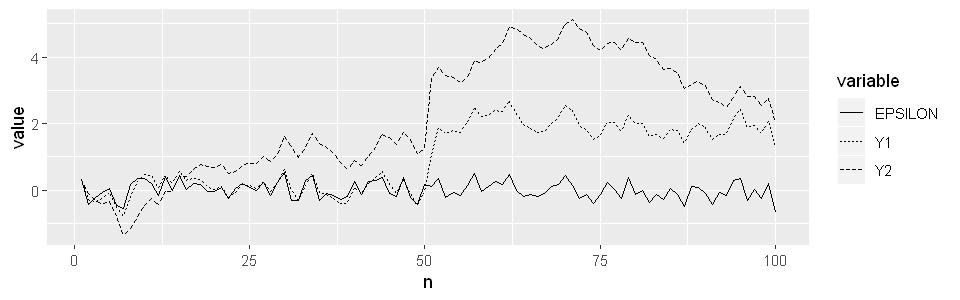

In [48]:
tsb <- read_excel("Data/BREAK.xls")
tsb$n <- seq_along(tsb$Y1) 
head(tsb)

tsb %>% gather(variable, value, -n) %>% ggplot(aes(n, value, linetype=variable)) + 
geom_line()

In [15]:
acf(tsb$Y1, plot=F, lag=6)


Autocorrelations of series 'tsb$Y1', by lag

    0     1     2     3     4     5     6 
1.000 0.942 0.878 0.836 0.805 0.768 0.724 

In [24]:
dy <- diff(tsb$Y1)
y <- tsb$Y1[-1]
summary(dynlm(dy ~ 0 + L(y)))
summary(dynlm(dy ~ L(y)))
summary(dynlm(dy ~ L(y) + seq_along(y)))


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ 0 + L(y))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7542 -0.2798 -0.0486  0.2080  1.1068 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)
L(y)  0.03188    0.02347   1.358    0.177

Residual standard error: 0.328 on 98 degrees of freedom
Multiple R-squared:  0.01848,	Adjusted R-squared:  0.008468 
F-statistic: 1.845 on 1 and 98 DF,  p-value: 0.1774



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74046 -0.23747 -0.02448  0.21907  1.12667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.04283    0.04673  -0.917    0.362
L(y)         0.05349    0.03328   1.607    0.111

Residual standard error: 0.3283 on 97 degrees of freedom
Multiple R-squared:  0.02594,	Adjusted R-squared:  0.0159 
F-statistic: 2.584 on 1 and 97 DF,  p-value: 0.1112



Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y) + seq_along(y))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62978 -0.23042 -0.04045  0.22218  1.11892 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.087034   0.068379   1.273  0.20615   
L(y)          0.165877   0.054786   3.028  0.00316 **
seq_along(y) -0.004833   0.001901  -2.543  0.01259 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3194 on 96 degrees of freedom
Multiple R-squared:  0.08742,	Adjusted R-squared:  0.06841 
F-statistic: 4.598 on 2 and 96 DF,  p-value: 0.01239


In [25]:
adf.test(y)


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -1.8402, Lag order = 4, p-value = 0.6427
alternative hypothesis: stationary


In [45]:
pulse <- rep(0,99)
pulse[50] <- 1
shift <- c(rep(0,49), rep(1,50))

a <- summary(dynlm(dy ~ L(y) + seq_along(y) + pulse + shift ))
a


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y) + seq_along(y) + pulse + shift)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58699 -0.16954  0.02255  0.17968  0.83078 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.026852   0.064496  -0.416    0.678    
L(y)          0.488144   0.092666   5.268 8.73e-07 ***
seq_along(y) -0.000142   0.002003  -0.071    0.944    
pulse         1.560366   0.298216   5.232 1.01e-06 ***
shift        -0.904912   0.221642  -4.083 9.34e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2776 on 94 degrees of freedom
Multiple R-squared:  0.325,	Adjusted R-squared:  0.2963 
F-statistic: 11.31 on 4 and 94 DF,  p-value: 1.544e-07


In [47]:
(a$coefficients["L(y)", "Estimate"] - 1)/a$coefficients["L(y)", "Std. Error"]

[1] -5.523646

In [52]:
dy <- diff(tsb$Y2)
y <- tsb$Y2[-1]
adf.test(y)

Warning message in adf.test(y):
"p-value greater than printed p-value"


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -0.24383, Lag order = 4, p-value = 0.99
alternative hypothesis: stationary


In [53]:
pulse <- rep(0,99)
pulse[50] <- 1
shift <- c(rep(0,49), rep(1,50))

a <- summary(dynlm(dy ~ L(y) + seq_along(y) + pulse + shift ))
a


Time series regression with "numeric" data:
Start = 1, End = 99

Call:
dynlm(formula = dy ~ L(y) + seq_along(y) + pulse + shift)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45685 -0.20308 -0.01155  0.19902  0.49005 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.037576   0.060989   0.616  0.53931    
L(y)          0.092303   0.033939   2.720  0.00778 ** 
seq_along(y) -0.003042   0.001863  -1.633  0.10582    
pulse         2.095776   0.265418   7.896 5.27e-12 ***
shift        -0.187602   0.143272  -1.309  0.19359    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2586 on 94 degrees of freedom
Multiple R-squared:  0.4453,	Adjusted R-squared:  0.4216 
F-statistic: 18.86 on 4 and 94 DF,  p-value: 2.058e-11


In [54]:
(a$coefficients["L(y)", "Estimate"] - 1)/a$coefficients["L(y)", "Std. Error"]

[1] -26.74502